<a href="https://colab.research.google.com/github/kaveku/test-live-coding/blob/master/Angela_Munyao_LogRegression_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
data=pd.read_csv("/content/diabetes.csv")

In [21]:
def feature_standard(data ):
  ######## write your code #########
  mu = np.mean(data , axis=0)
  std=np.std(data , axis = 0)
  data_Scaled = (data - mu)/std
  return data_Scaled

In [22]:
data.iloc[:,:-1] = feature_standard(data.iloc[: ,:-1])
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [23]:
def split_data(df, train_percent):
  np.random.seed(40)
  perm=np.random.permutation(df.index)
  n=len(df)
  train_index=int(train_percent*n)
  train=data.iloc[perm[:train_index]]
  test=data.iloc[perm[train_index:]]

  x_train, y_train, x_test, y_test= train.iloc[:,:-1], train.iloc[:,-1], test.iloc[:,:-1], test.iloc[:,-1]
  return x_train, y_train, x_test, y_test

In [24]:
x_train, y_train, x_test, y_test=split_data(data, 0.8)
#print(y_test)
#x_train=x_train.T
#y_train=y_train.values.reshape(1, x_train.shape[1])
#x_test=x_test.T
#y_test=y_test.values.reshape(1, x_test.shape[1])
print((y_train).shape)
print(y_train.shape, x_train.shape)


(614,)
(614,) (614, 8)


In [25]:
x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
370,-0.250952,1.630752,0.666618,1.722735,3.344656,0.813225,5.028871,-0.701198
388,0.342981,0.723135,0.666618,0.342717,1.781735,0.000942,-0.060029,2.106697
611,-0.250952,1.662050,-0.574128,0.091805,0.991591,0.115169,0.365808,0.234767
550,-0.844885,-0.153185,0.046245,0.468173,-0.692891,-0.582887,-0.809018,-1.041549
232,-0.844885,-1.311179,0.563223,0.279989,-0.371623,-0.836725,0.335607,-0.956462


In [26]:
def sigmoid(x):
  return 1/(1+ np.exp(-x))

In [27]:
#x_train = np.hstack([np.ones((x_train.shape[0], 1)),x_train])
#y_train = np.hstack([np.ones((y_train.shape[0], 1)),y_train])
#print(y_train.shape, y_train.values)
print(y_train.shape)

(614,)


In [28]:
def model(x_train, y_train, lr, iter, batch_size):
  n=x_train.shape[0]
  batch_num=int(n/batch_size)
  left_last_batch=n%batch_size
  d=x_train.shape[1]
  #x_train = np.hstack([np.ones((x_train.shape[0], 1)), x_train.shape])

  W=np.zeros((d, 1))
  B= 0
  cost_list=[]
  cost_1=[]
  cost_2=[]
  cost_2_3=[]
  #y_train = y_train.reshape(-1, 1)
  #print(y_train.shape)
  for i in range(iter):
    #z=np.dot(x_train, W) +B
    a=np.c_[x_train,y_train]    
    np.random.shuffle(a)
    #print(x_train.shape, y_train.shape)
    x_train_shuffled =a[:,:-1]
    y_train_shuffled= a[:,-1]
    #print(x_train.shape, y_train.shape)
      
    for j in range(batch_num):
      x_train_new=x_train_shuffled[j*batch_size:j*batch_size+batch_size]
      y_train_new=y_train_shuffled[j*batch_size:j*batch_size+batch_size]

      z=np.dot(x_train_new,W)
      y_pred=sigmoid(z)
      #print(y_train.dtype)
      #print(x_train_new.shape, y_train_new.shape)
      #y_train*np.log(y_pred)
      cost=-(1/n)*np.sum(y_train_new*np.log(y_pred)+(1-y_train_new)*np.log(1-y_pred))
      dW=-(1/n)*np.dot(x_train_new.T, y_train_new - y_pred)
      #dW = -x_train.T @ (y_train - y_pred)
      
      #dB=(1/n)*np.sum(y_train-y_pred)
      #print(dW)
      W = W -lr*dW
      #print(dW.shape, W.shape)
    if (i % 100 == 0):
      print(f"The cost at iteration {i}  = {cost}")
    cost_list.append(cost)

  plt.figure()
  plt.plot(np.arange(iter), cost_list, c='blue')
  plt.xlabel('Iterations')
  plt.ylabel('Cost, ' + r'$J(\theta)$')
  #print(cost_list)

    

The cost at iteration 0  = 0.1126813516353854
The cost at iteration 100  = 0.11239082997254961


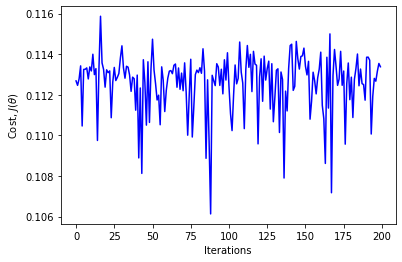

In [33]:
model(x_train, y_train, 0.5, 200,10)

In [155]:
print(x_train.shape, y_train.shape)

(614, 8) (614,)


In [34]:
def model_L1_reg(x_train, y_train, lr, iter, batch_size, lambda_val):
  n=x_train.shape[0]
  batch_num=int(n/batch_size)
  left_last_batch=n%batch_size
  d=x_train.shape[1]
  #x_train = np.hstack([np.ones((x_train.shape[0], 1)), x_train.shape])

  W=np.zeros((d, 1))
  B= 0
  cost_list=[]
  cost_1=[]
  cost_2=[]
  cost_2_3=[]
  #y_train = y_train.reshape(-1, 1)
  #print(y_train.shape)
  for i in range(iter):
    #z=np.dot(x_train, W) +B
    a=np.c_[x_train,y_train]    
    np.random.shuffle(a)
    #print(x_train.shape, y_train.shape)
    x_train_shuffled =a[:,:-1]
    y_train_shuffled= a[:,-1]
    #print(x_train.shape, y_train.shape)
      
    for j in range(batch_num):
      x_train_new=x_train_shuffled[j*batch_size:j*batch_size+batch_size]
      y_train_new=y_train_shuffled[j*batch_size:j*batch_size+batch_size]

      z=np.dot(x_train_new,W)
      y_pred=sigmoid(z)
      #print(y_train.dtype)
      #print(x_train_new.shape, y_train_new.shape)
      #y_train*np.log(y_pred)
      cost=-(1/n)*np.sum(y_train_new*np.log(y_pred)+(1-y_train_new)*np.log(1-y_pred))+lambda_val*np.sum(np.power((y_train_new-y_pred),1))
      dW=-(1/n)*np.dot(x_train_new.T, y_train_new - y_pred)
      #dW = -x_train.T @ (y_train - y_pred)
      
      #dB=(1/n)*np.sum(y_train-y_pred)
      #print(dW)
      W = W -lr*dW

      #print(dW.shape, W.shape)
    if (i % 100 == 0):
      print(f"The cost at iteration {i}  = {cost}")
    cost_list.append(cost)

  plt.figure()
  plt.plot(np.arange(iter), cost_list, c='blue')
  plt.xlabel('Iterations')
  plt.ylabel('Cost, ' + r'$J(\theta)$')
  #print(cost_list)
 

The cost at iteration 0  = -20.860887456973316
The cost at iteration 100  = -19.89163476733749
The cost at iteration 200  = -13.059278412268172
The cost at iteration 300  = -7.85375921151217
The cost at iteration 400  = -13.337617528980905
The cost at iteration 500  = -6.868170268523483
The cost at iteration 600  = -20.30721444286377
The cost at iteration 700  = -6.954334522557562
The cost at iteration 800  = -7.735889561876849
The cost at iteration 900  = -28.55847212857516


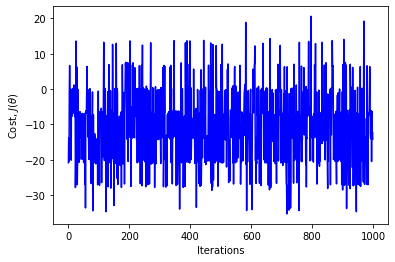

In [35]:
model_L1_reg(x_train, y_train, 0.8, 1000,10, 0.7)

In [36]:
def model_L2_reg(x_train, y_train, lr, iter, batch_size, lambda_val):
  n=x_train.shape[0]
  batch_num=int(n/batch_size)
  left_last_batch=n%batch_size
  d=x_train.shape[1]
  #x_train = np.hstack([np.ones((x_train.shape[0], 1)), x_train.shape])

  W=np.zeros((d, 1))
  B= 0
  cost_list=[]
  cost_1=[]
  cost_2=[]
  cost_2_3=[]
  #y_train = y_train.reshape(-1, 1)
  #print(y_train.shape)
  for i in range(iter):
    #z=np.dot(x_train, W) +B
    a=np.c_[x_train,y_train]    
    np.random.shuffle(a)
    #print(x_train.shape, y_train.shape)
    x_train_shuffled =a[:,:-1]
    y_train_shuffled= a[:,-1]
    #print(x_train.shape, y_train.shape)
      
    for j in range(batch_num):
      x_train_new=x_train_shuffled[j*batch_size:j*batch_size+batch_size]
      y_train_new=y_train_shuffled[j*batch_size:j*batch_size+batch_size]

      z=np.dot(x_train_new,W)
      y_pred=sigmoid(z)
      #print(y_train.dtype)
      #print(x_train_new.shape, y_train_new.shape)
      #y_train*np.log(y_pred)
      cost=-(1/n)*np.sum(y_train_new*np.log(y_pred)+(1-y_train_new)*np.log(1-y_pred))+lambda_val*np.sum(np.power((y_train_new-y_pred),2))
      dW=-(1/n)*np.dot(x_train_new.T, y_train_new - y_pred)
      #dW = -x_train.T @ (y_train - y_pred)
      
      #dB=(1/n)*np.sum(y_train-y_pred)
      #print(dW)
      W = W -lr*dW

      #print(dW.shape, W.shape)
    if (i % 100 == 0):
      print(f"The cost at iteration {i}  = {cost}")
    cost_list.append(cost)
    #print(cost_list)

  plt.figure()
  plt.plot(np.arange(iter), cost_list, c='blue')
  plt.xlabel('Iterations')
  plt.ylabel('Cost, ' + r'$J(\theta)$')
  #print(cost_list)
 

The cost at iteration 0  = 17.68437317968879
The cost at iteration 100  = 17.723849662119715
The cost at iteration 200  = 17.663164734507806
The cost at iteration 300  = 17.697665194700626
The cost at iteration 400  = 17.722376277152048
The cost at iteration 500  = 18.065281754671787
The cost at iteration 600  = 17.136354770110934
The cost at iteration 700  = 16.971412384550977
The cost at iteration 800  = 17.75124534881367
The cost at iteration 900  = 17.682156473933787


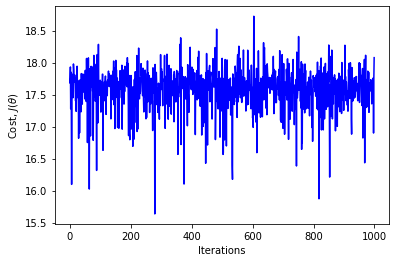

In [37]:
model_L2_reg(x_train, y_train, 0.8, 1000,10, 0.7)